# Car Price Prediction Project

## Problem Statement: 

### With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make carprice valuation model.

## Data Description of the Dataset

from looking at the above tab we can look at what kind of data we are hasving and we can see that this is a regression problem in which we have to predict the price of the cars based on the other columns

let us now import all the essential python libraries and modules so that we can perform some necessary operations such as importing the data, Preprocessing the data, Cleaning the data, Model Building, Model Evaluation, Saving the model and Many more things.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from scipy.stats import zscore, boxcox, yeojohnson
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, power_transform
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lets us now import our dataset using pd.read_csv("dataset.csv") and save it in ds variable

In [2]:
ds = pd.read_csv("S:\Data Science Projects\Flip Robo\Car Price Prediction\Dataset.csv")

As we have imported the dataset lets now see the first 5 rows of dataset using ds.head()

In [3]:
ds.head()

,Unnamed: 0,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Year of Manufacture,Price
0,0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,2020,659399
1,1,Maruti,IGNIS,SIGMA 1.2 K12,1,2206,Petrol,Manual,2020,525699
2,2,Maruti,S,VXI,1,3176,Petrol,NaN,2020,408499
3,3,Maruti,Swift,VDI,1,11019,Diesel,Manual,2013,378499
4,4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,2015,123499


from above we can see that the dataset contains 10 columns and our target column is Price and rest all the columns are independent columns and we have to predict the Price using all the Other columns

from above we can see the column name 'Unnamed: 0' has just the index of the data so we will remove that column and then we will look into the data further

In [4]:
ds.drop("Unnamed: 0",1,inplace=True)

In [5]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Year of Manufacture,Price
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,2020,659399
1,Maruti,IGNIS,SIGMA 1.2 K12,1,2206,Petrol,Manual,2020,525699
2,Maruti,S,VXI,1,3176,Petrol,NaN,2020,408499
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,2013,378499
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,2015,123499


from above we can see that we have removed the Unnamed: 0  column from the dataset using ds.drop() method

lets see the shape of the data using ds.shape

In [6]:
ds.shape

(5312, 9)

from above we can see the shape of the data that is 5312 rows and 9 Columns

Lets now see more information about the data using ds.info() method

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 5312 non-null   object
 1   Model Name           5312 non-null   object
 2   Variant              5312 non-null   object
 3   Owner                5312 non-null   object
 4   Kilometer            5312 non-null   int64 
 5   Fuel                 5312 non-null   object
 6   Transmission         5070 non-null   object
 7   Year of Manufacture  5312 non-null   int64 
 8   Price                5312 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 373.6+ KB


from above we can see that there are 5312 records and 9 columns in the dataset and from above we can also see that in Transmission Column we have some missing values we will fix that in Data Cleaning Part lets now see how many missing values are there in the dataset using ds.isnull().sum()

In [8]:
ds.isnull().sum()

Name                     0
Model Name               0
Variant                  0
Owner                    0
Kilometer                0
Fuel                     0
Transmission           242
Year of Manufacture      0
Price                    0
dtype: int64

from above we can see that we have missing values in Transmission Columns and the count is 242 Missing Data

lets calculate the Percentage of missing values in the Transmission Column

In [9]:
rows, columns = ds.shape
perc = (ds['Transmission'].isnull().sum()/rows)*100
print("Missing data Percentage {} %".format(perc))

Missing data Percentage 4.555722891566265 %


from above we can see that 4.5% of the data is missing in the Transmission Column so there are two options either we can drop all the rows with the missing values or we can replace them using the mode of the entire transmission column

So we will use Mode of the Transmission data to replace the nan values so that we can get enough data for training our model

lets now see the visualization for null values in the dataset using heatmap

<AxesSubplot:>

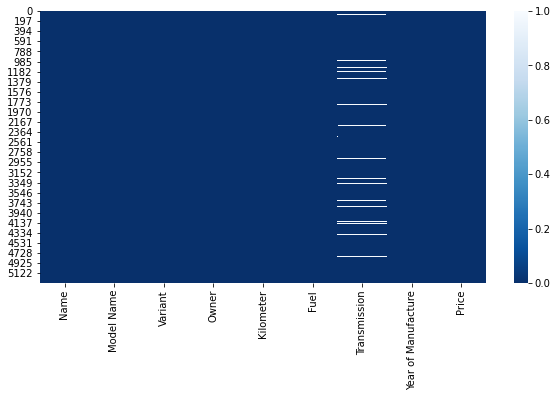

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.isnull(), cmap='Blues_r')

from above we can see the heatmap of missing values and we can see the missing values are only present in the Transmission Column the white line indicates the Missing values in the visualization

In [11]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Year of Manufacture,Price
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,2020,659399
1,Maruti,IGNIS,SIGMA 1.2 K12,1,2206,Petrol,Manual,2020,525699
2,Maruti,S,VXI,1,3176,Petrol,NaN,2020,408499
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,2013,378499
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,2015,123499


lets now see the value caounts of each columns using ds.value_counts()

In [12]:
for i in ds.columns.drop(['Year of Manufacture','Price','Kilometer'],1):
    print(ds[i].value_counts().sort_index(ascending=True))

Audi                  25
BMW                   28
Bajaj                  1
Chevrolet             35
Datsun                24
Fiat                  10
Force Motors           1
Ford                 160
Hindustan Motors       1
Honda                428
Hyundai             1078
ISUZU                  1
Jaguar                 4
Jeep                  12
KIA                   16
Landrover              4
MG                    18
Mahindra             164
Maruti              2317
Maruti Suzuki        114
Mercedes              24
Mercedes-Benz          8
Mini                   3
Mitsubishi             6
Nissan                25
Other Brands           2
Others                 1
Renault              155
Royal Enfield          1
Skoda                 53
Ssangyong              5
TOYOTA                 1
Tata                 109
Toyota               296
Volkswagen           182
Name: Name, dtype: int64
3             8
5             6
5 Series      4
800           4
A            26
           ... 
YARI

in Name column we can see that we have repeated names but they are understand Differently because of the Names, Spellings, Upper Case, Lower Case so we need to fix those the Cars which has same name are:

We will fix this in Data Cleaning Part now lets look at Descriptive Statistics using ds.dscribe()

In [13]:
ds.describe()

,Kilometer,Year of Manufacture,Price
count,5312.000000,5312.000000,5.312000e+03
mean,63047.338667,2014.387236,5.129699e+05
std,43397.991034,3.093852,3.968256e+05
min,0.000000,1991.000000,2.000000e+04
25%,32137.500000,2012.000000,3.008490e+05
50%,56683.500000,2015.000000,4.118990e+05
75%,85000.000000,2017.000000,5.993458e+05
max,810000.000000,2021.000000,6.500000e+06


from above we get descriptive Statistics for 3 columns as for this we need Numeric Columns and only these 3 columns are numeric type

lets see Visualization for the Descriptive Statistics using heatmap

<AxesSubplot:>

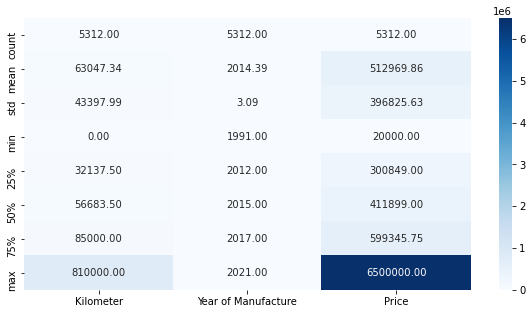

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(ds.describe(), fmt='.2f',annot=True,cmap='Blues')

from here we can see that price column has a huge data that can be an Outlier but as price is our output column we will not remove the outliers form that column and as other columns are categoricaL SO we will only remove outliers from Kilometer columns and fix the skewness for that column

In [15]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Year of Manufacture,Price
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,2020,659399
1,Maruti,IGNIS,SIGMA 1.2 K12,1,2206,Petrol,Manual,2020,525699
2,Maruti,S,VXI,1,3176,Petrol,NaN,2020,408499
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,2013,378499
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,2015,123499


# Data Cleaning

so we need to convert them into same form so that they are categorized as same thing

In [16]:
ds['Name'] = ds['Name'].replace('Maruti Suzuki','Maruti').replace('TOYOTA','Toyota').replace('Mercedes-Benz','Mercedes')


In [17]:
ds['Name'].value_counts().sort_index(ascending=True)

Audi                  25
BMW                   28
Bajaj                  1
Chevrolet             35
Datsun                24
Fiat                  10
Force Motors           1
Ford                 160
Hindustan Motors       1
Honda                428
Hyundai             1078
ISUZU                  1
Jaguar                 4
Jeep                  12
KIA                   16
Landrover              4
MG                    18
Mahindra             164
Maruti              2431
Mercedes              32
Mini                   3
Mitsubishi             6
Nissan                25
Other Brands           2
Others                 1
Renault              155
Royal Enfield          1
Skoda                 53
Ssangyong              5
Tata                 109
Toyota               297
Volkswagen           182
Name: Name, dtype: int64

from above we can see that we have replaced all the three categories and now it is categorizing those as same thing 

in owner column we can see that there is a category 4+ we will replce with 5 as 4+ Owners can't be 4.5 Owner so we will replace it with 5

In [18]:
ds['Owner'] = ds['Owner'].replace('4+', '5')

In [19]:
ds['Owner'].value_counts()

1    3932
2    1190
3     168
4      19
5       3
Name: Owner, dtype: int64

from above we can see that we have successfully replaced 4+ with 5

lets now see it for other columns to which have more categories

In [20]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Year of Manufacture,Price
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,2020,659399
1,Maruti,IGNIS,SIGMA 1.2 K12,1,2206,Petrol,Manual,2020,525699
2,Maruti,S,VXI,1,3176,Petrol,NaN,2020,408499
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,2013,378499
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,2015,123499


In [21]:
ds['Model Name'] =ds['Model Name'].replace('5','5 Series').replace('A','A Class').replace('Elite','Elite i20').replace('Eon','EON').replace('Hector','HECTOR').replace('IGNIS','Ignis').replace('KWID','Kwid').replace('NEW','New').replace('OMNi','Omni').replace('S','S-Cross').replace('S Cross','S-cross').replace('Triber','TRIBER').replace("VENUE",'Venue').replace('Wagon','Wagon R').replace('XUV','XUV300')

In [22]:
ds['Variant'] = ds['Variant'].str.upper()

In [23]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Year of Manufacture,Price
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,2020,659399
1,Maruti,Ignis,SIGMA 1.2 K12,1,2206,Petrol,Manual,2020,525699
2,Maruti,S-Cross,VXI,1,3176,Petrol,NaN,2020,408499
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,2013,378499
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,2015,123499


lets now remove Nan values from the Transmission Column

In [24]:
ds['Transmission'].fillna(ds['Transmission'].mode()[0], inplace=True)

from above we can see that we have replaced the Nan Values with the mode of the Transmission Column that is  Manual

lets create another column name Age of Cars in our Dataset

In [25]:
ds['Age of Car'] = 2021 - ds['Year of Manufacture']
ds.drop('Year of Manufacture',1,inplace=True)

# EDA Process

In [26]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Price,Age of Car
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,659399,1
1,Maruti,Ignis,SIGMA 1.2 K12,1,2206,Petrol,Manual,525699,1
2,Maruti,S-Cross,VXI,1,3176,Petrol,Manual,408499,1
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,378499,8
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,123499,6


Maruti              2431
Hyundai             1078
Honda                428
Toyota               297
Volkswagen           182
Mahindra             164
Ford                 160
Renault              155
Tata                 109
Skoda                 53
Chevrolet             35
Mercedes              32
BMW                   28
Audi                  25
Nissan                25
Datsun                24
MG                    18
KIA                   16
Jeep                  12
Fiat                  10
Mitsubishi             6
Ssangyong              5
Landrover              4
Jaguar                 4
Mini                   3
Other Brands           2
Royal Enfield          1
Hindustan Motors       1
Force Motors           1
ISUZU                  1
Others                 1
Bajaj                  1
Name: Name, dtype: int64


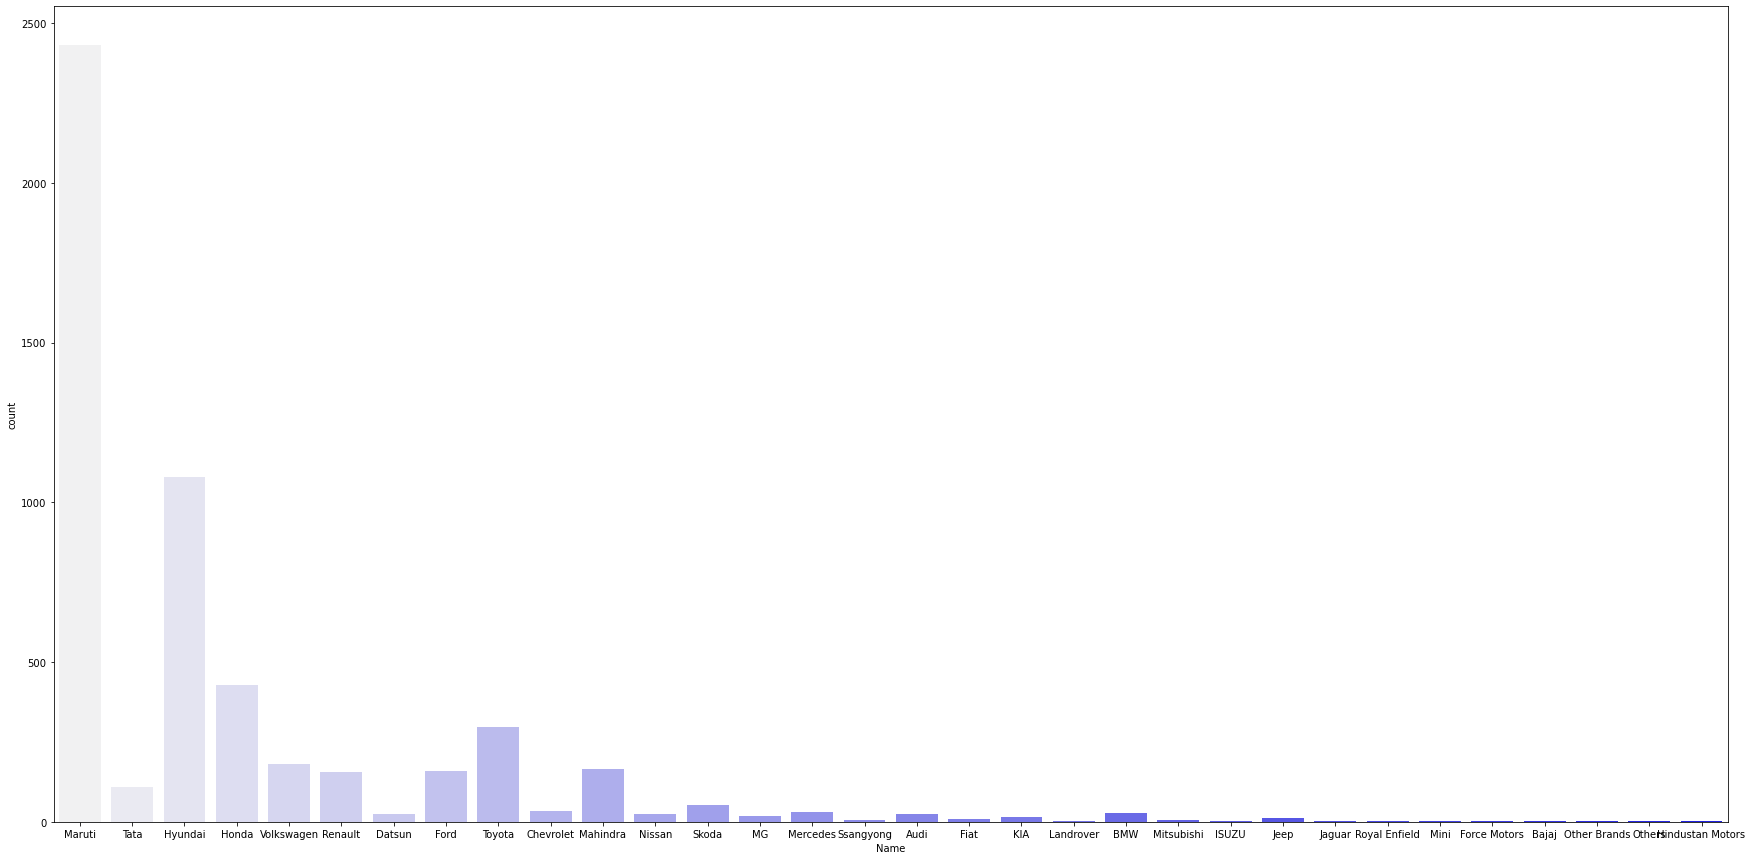

In [27]:
plt.figure(figsize=(30,15))
sns.countplot(ds['Name'], palette='light:b')
print(ds['Name'].value_counts())

from above graph we can see that most data is from Maruti Company followed by Hyundai

1    3932
2    1190
3     168
4      19
5       3
Name: Owner, dtype: int64


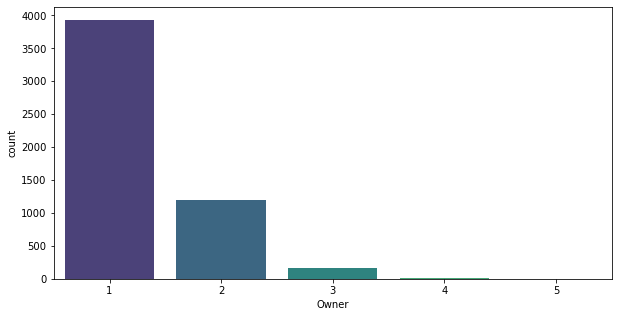

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(ds['Owner'], palette='viridis')
print(ds['Owner'].value_counts())

from above we can see that in our dataset the car which are present has been Sold by 1st Owner followed by 2nd Owner

Petrol           3157
Diesel           1942
Petrol + CNG      178
Petrol + LPG       17
CNG & Hybrids      16
LPG                 2
Name: Fuel, dtype: int64


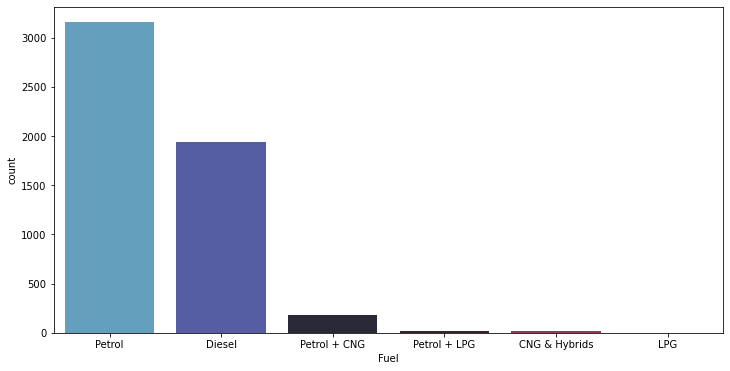

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(ds['Fuel'], palette='icefire')
print(ds['Fuel'].value_counts())

from above we can see that most of the Cars in our dataset has Fuel type as Petrol followed By Diesel and We also has some Hybrid Cars in our dataset

Manual       4714
Automatic     598
Name: Transmission, dtype: int64


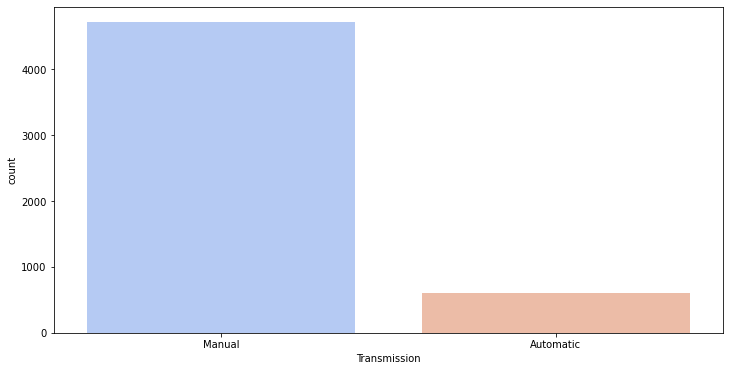

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(ds['Transmission'], palette='coolwarm')
print(ds['Transmission'].value_counts())

from above we can see that most of the Cars in our dataset has Manual Transmission

<Figure size 864x432 with 0 Axes>

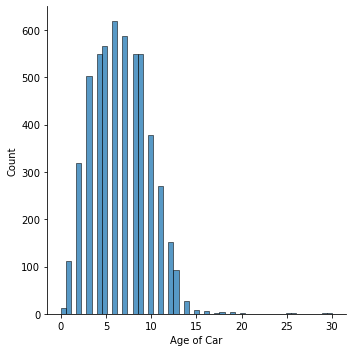

In [31]:
plt.figure(figsize=(12,6))
sns.displot(ds['Age of Car'])

from above we can see that most of the cars in our dataset are 7 years old

<AxesSubplot:xlabel='Kilometer'>

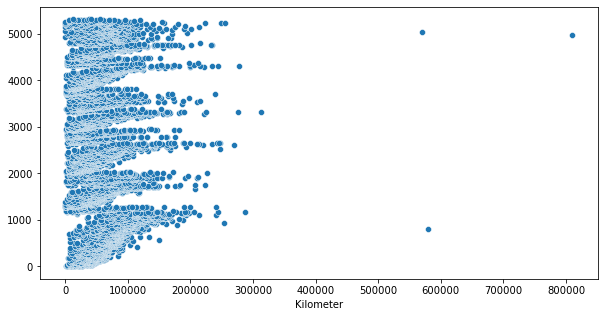

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(ds['Kilometer'],ds.index)

from above graph we can see that most of our cars has used for less than 300000 kilometers and there are some of them which has used for more that 500000 kilometers they can be outliers we will fix them in Data Preprocessing Part

<Figure size 720x360 with 0 Axes>

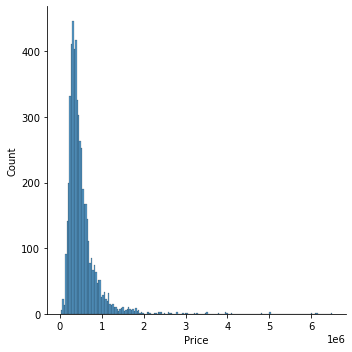

In [33]:
plt.figure(figsize=(10,5))
sns.displot(ds['Price'])

from above graph we can see that most of the cars in the data set is between 0.5 million to 1 million Rupees and some of the Cars are priced over 6 million

In [34]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Price,Age of Car
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,659399,1
1,Maruti,Ignis,SIGMA 1.2 K12,1,2206,Petrol,Manual,525699,1
2,Maruti,S-Cross,VXI,1,3176,Petrol,Manual,408499,1
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,378499,8
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,123499,6


<AxesSubplot:xlabel='Name', ylabel='Price'>

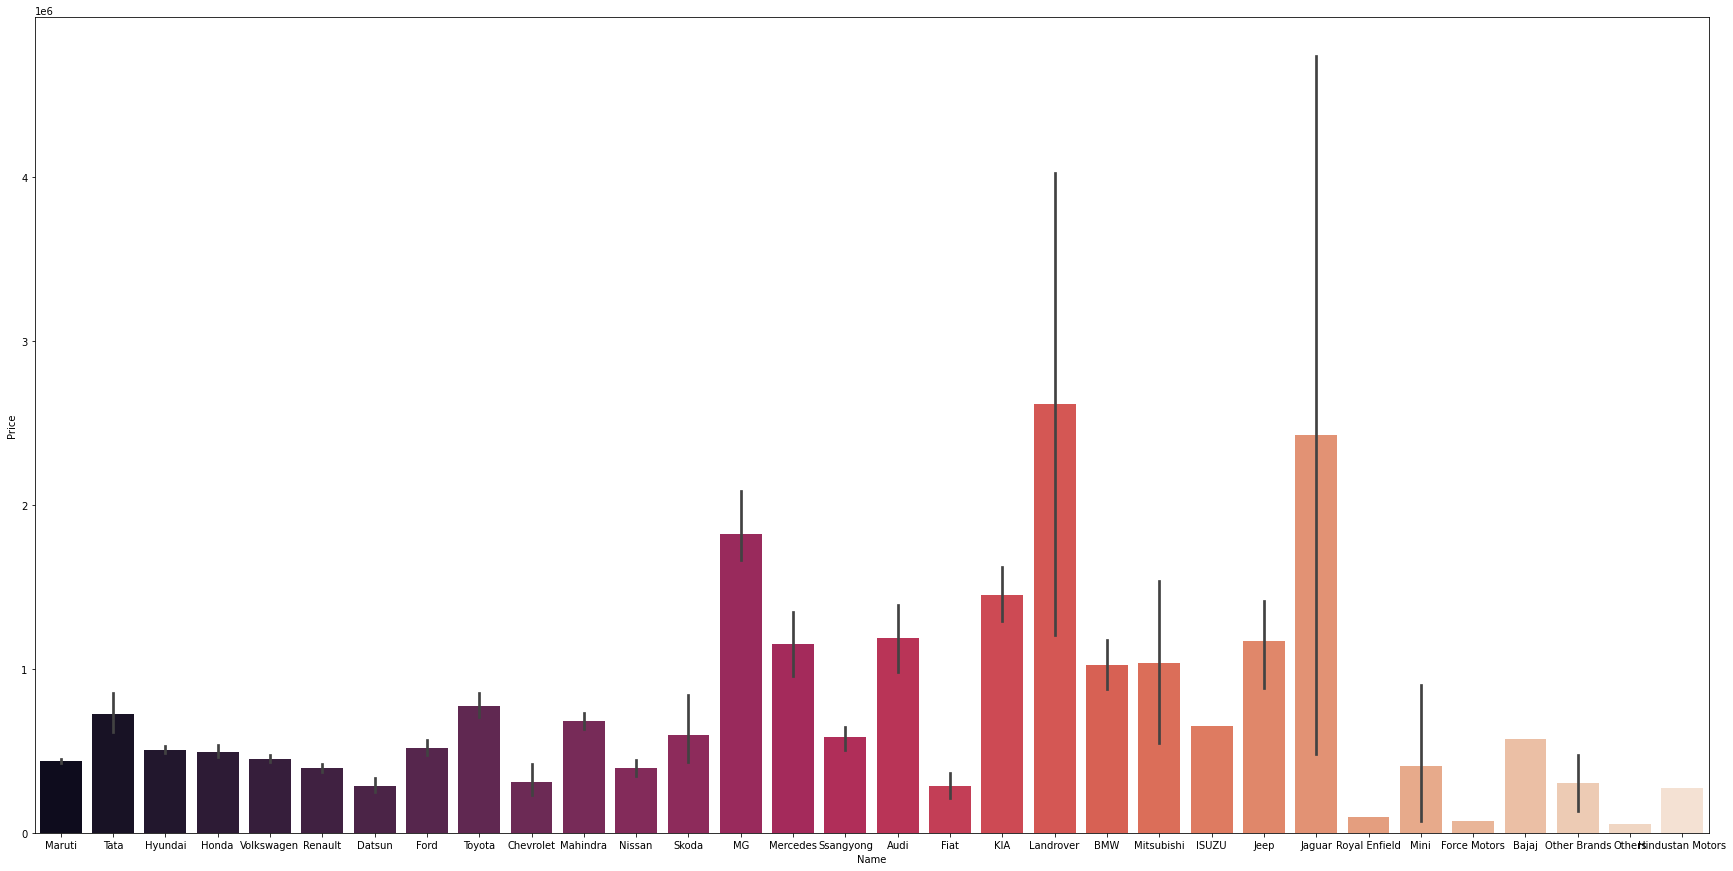

In [35]:
plt.figure(figsize = (30,15))
sns.barplot(ds['Name'],ds['Price'], palette='rocket')

from above we can see that Toyota, Jaguar, Skoda, Honda has better selling Price in the market than other Car Companies

<AxesSubplot:xlabel='Owner', ylabel='Price'>

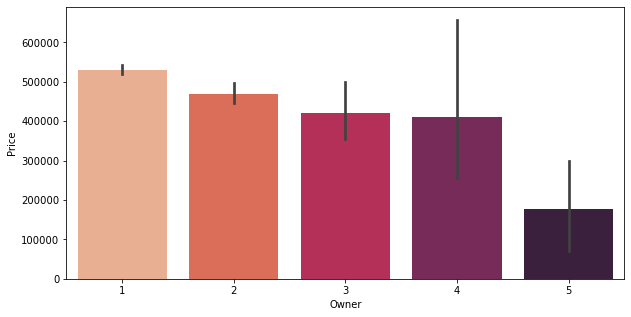

In [36]:
plt.figure(figsize = (10,5))
sns.barplot(ds['Owner'],ds['Price'], palette='rocket_r')

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

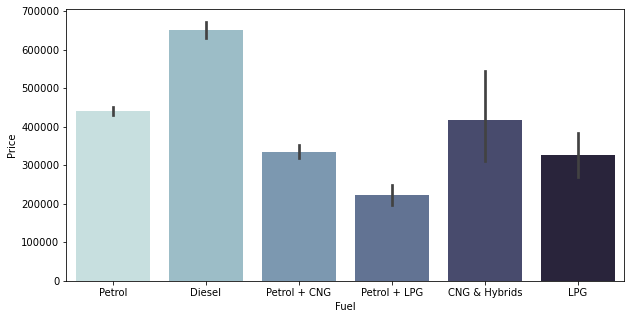

In [37]:
plt.figure(figsize = (10,5))
sns.barplot(ds['Fuel'],ds['Price'], palette='ch:start=.2,rot=-.3')

from above we can see Diesel engine has higher selling price as compared to other type of Engines

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

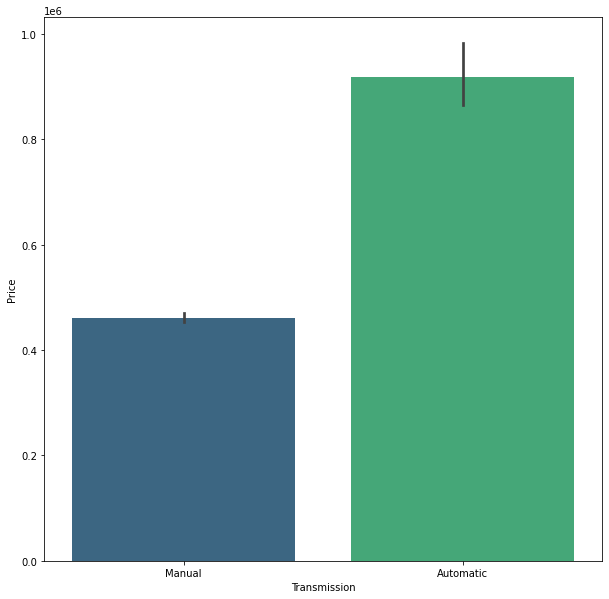

In [38]:
plt.figure(figsize = (10,10))
sns.barplot(ds['Transmission'],ds['Price'], palette='viridis')

from above we can see that Automatic Transmission has Higher price than Manual Transmission i.e Technology has Higher price

<AxesSubplot:xlabel='Age of Car', ylabel='Price'>

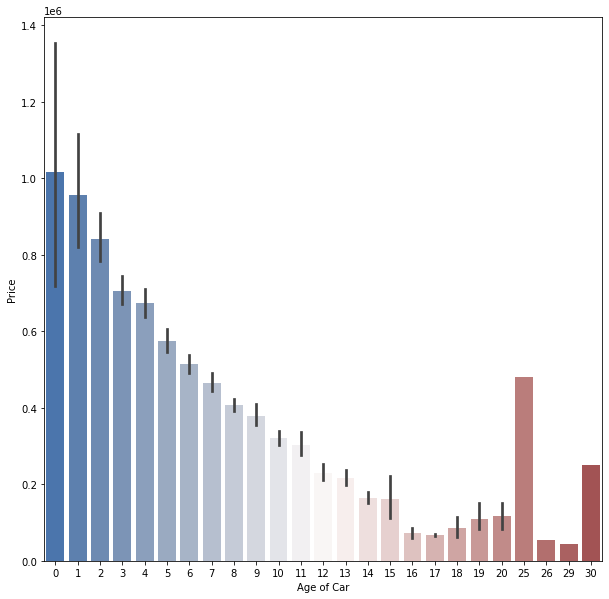

In [39]:
plt.figure(figsize = (10,10))
sns.barplot(ds['Age of Car'],ds['Price'], palette='vlag')

from above we can see that as the age of the car increases the price of the car decreases its natural but we have cares which is 25 but the selling value of the car is high we will see if it is a ourlier or not and then we will fix it

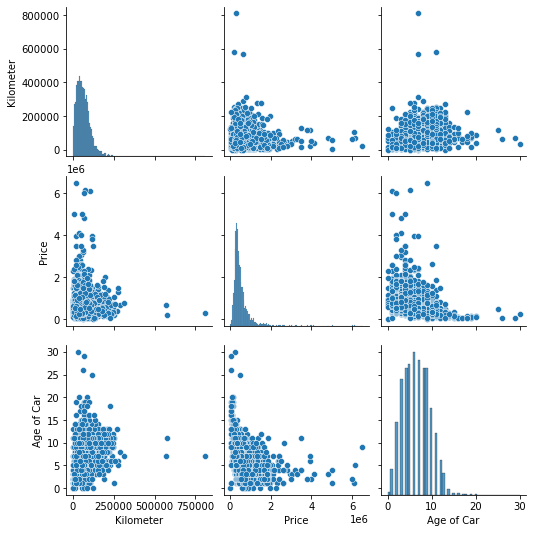

In [40]:
sns.pairplot(ds)

In [41]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Price,Age of Car
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,659399,1
1,Maruti,Ignis,SIGMA 1.2 K12,1,2206,Petrol,Manual,525699,1
2,Maruti,S-Cross,VXI,1,3176,Petrol,Manual,408499,1
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,378499,8
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,123499,6


### What we Understand from Exploratory Data Analysis

#### 1) From Car Company Graph we Understand that Car Companies Like Skoda, Mercedes, Jaguar, Toyota, Honda has Higher Selling Price as they are big companies more Customers are attracted to them so the selling price of this Company Cars are the Highest, These Car Companaies also has good Customer Service so most of the People tends to buy this Cars.
#### 2) From Owner vs Price we can understand that as the number of owner increases the price of the Car decrease
#### 3) From Fuel vs Price we can see that the price is higher for Diesel car than Petrol Because most of the People in India wants less runnning cost and using diesel as a fuel the running cost Decreases as Price of Diesel is cheaper than Petrol so Car which uses Diesel as Fuel has Higher Selling Price.
#### 4) From Transmission vs Price we can see that the price of Automatic transmission is Higher than the Manual as in Automatic Transmission user don't need to Switch gear which is less tiring to the driver and it is easy to ride in city, traffic roads than the Manual gear cars
#### 5) From Age vs Price we see that newer the car higher is the selling price as the age of the car increases the selling price of the car decreases.

# Data Preprocessing

In [42]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Price,Age of Car
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,659399,1
1,Maruti,Ignis,SIGMA 1.2 K12,1,2206,Petrol,Manual,525699,1
2,Maruti,S-Cross,VXI,1,3176,Petrol,Manual,408499,1
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,378499,8
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,123499,6


# Before Removing Outlier Density Plot

<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

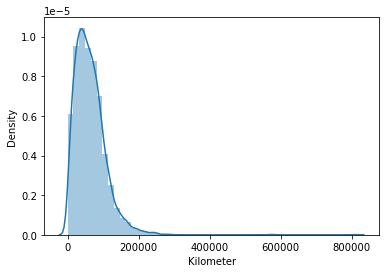

In [43]:
sns.distplot(ds['Kilometer'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

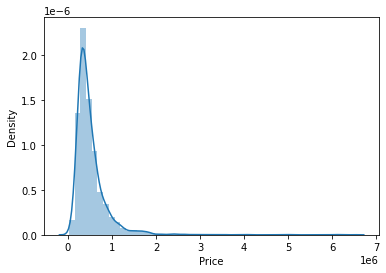

In [44]:
sns.distplot(ds['Price'])

<AxesSubplot:xlabel='Age of Car', ylabel='Density'>

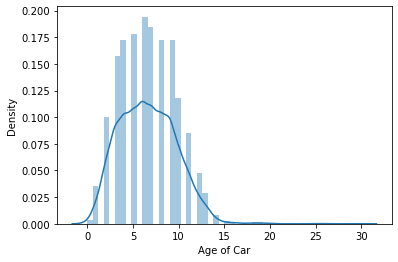

In [45]:
sns.distplot(ds['Age of Car'])

from above graphs we can see that the columns Age of the Car, Price of the Car and Kilometers of the Car are left skewed so lets fix this by removing the outliers from these columns

In [46]:
def Inter(col):
    IQR = ds[col].quantile(0.75) - ds[col].quantile(0.25)
    lower = ds[col].quantile(0.25)  - (IQR*3)
    upper = ds[col].quantile(0.75) + (IQR*3)
    return (lower, upper)

In [47]:
ds.head()

,Name,Model Name,Variant,Owner,Kilometer,Fuel,Transmission,Price,Age of Car
0,Maruti,Baleno,DELTA 1.2 K12,1,3920,Petrol,Manual,659399,1
1,Maruti,Ignis,SIGMA 1.2 K12,1,2206,Petrol,Manual,525699,1
2,Maruti,S-Cross,VXI,1,3176,Petrol,Manual,408499,1
3,Maruti,Swift,VDI,1,11019,Diesel,Manual,378499,8
4,Tata,Nano,XT TWIST,1,26554,Petrol,Manual,123499,6


In [48]:
for i in ds.columns.drop(['Name','Model Name','Variant','Fuel','Transmission','Owner','Age of Car'], 1):
    lower, upper = Inter(i)
    if upper > 0:
        ds.loc[ds[i] >= upper, i] = upper

# After Removing Outlier Density Plot

<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

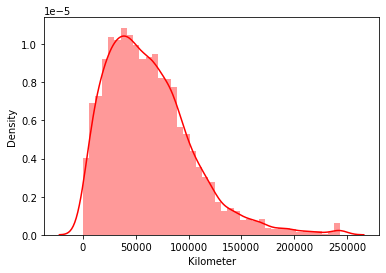

In [49]:
sns.distplot(ds['Kilometer'], color='red')

<AxesSubplot:xlabel='Age of Car', ylabel='Density'>

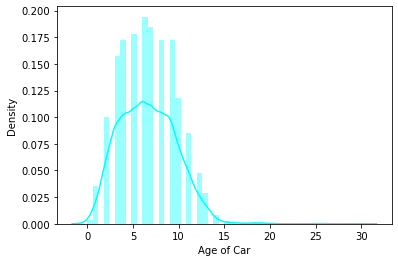

In [50]:
sns.distplot(ds['Age of Car'], color='cyan')

<AxesSubplot:xlabel='Price', ylabel='Density'>

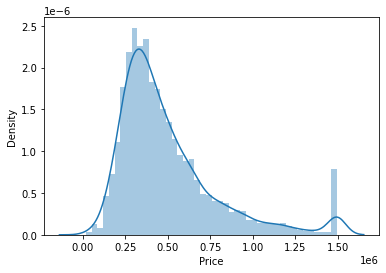

In [51]:
sns.distplot(ds['Price'])

as we have replaced the outlier data with Inter Quantile range now we can see that our data is slightly normally distributed lets now use skewness removal of our data

In [52]:
ds.skew()

Owner         1.878240
Kilometer     1.139533
Price         1.624414
Age of Car    0.524183
dtype: float64

from above we can see the Skewness of the data

In [53]:
for i in ds.columns.drop(['Name','Model Name','Variant','Fuel','Transmission','Owner','Price','Age of Car'], 1):
    if ds[i].skew() > 0.5:
        ds[i] = np.cbrt(ds[i])
    elif ds[i].skew() > -0.5:
        ds[i] = np.cbrt(ds[i])

In [54]:
ds.skew()

Owner         1.878240
Kilometer    -0.282093
Price         1.624414
Age of Car    0.524183
dtype: float64

<AxesSubplot:xlabel='Kilometer', ylabel='Density'>

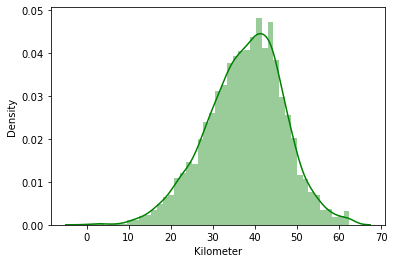

In [55]:
sns.distplot(ds['Kilometer'], color='green')

<AxesSubplot:xlabel='Age of Car', ylabel='Density'>

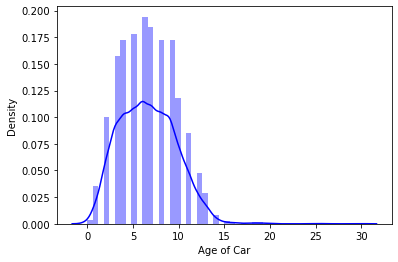

In [56]:
sns.distplot(ds['Age of Car'], color='blue')

from above we can see that we have almost converted our dataset to Normally distributed data nnow we are good to go to perform Machine Learning Algorithm to our Data

As we have Categorical Varibles in the Dataset so we will Convert them to Numeric using Label Encoder

In [57]:
le = LabelEncoder()

lets Seperate our Depenedent and Independent Variable and Save them in X and Y varibale

In [58]:
X = ds.drop('Price',1)
Y = ds['Price']

In [59]:
Xnew = X.apply(le.fit_transform)

lets now do min max Scaler to Scale the all the independent varible between 0-1

In [60]:
MS = MinMaxScaler()

In [61]:
Xnew = MS.fit_transform(Xnew)

In [62]:
Xnew = pd.DataFrame(Xnew, columns=X.columns)

as we got all the values lets now build our model and see which one performs better

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y, test_size=0.22, random_state=42)

We are first doing at Random State 42 then we will find the best Random State

In [64]:
li = LinearRegression()
li.fit(X_train,Y_train)
pred = li.predict(X_test)
print("R2 Score:",r2_score(Y_test, pred))
print("Mean Square Error:", mean_squared_error(Y_test, pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred))

R2 Score: 0.49144918571556884
Mean Square Error: 44764334836.1101
Mean Absolute Error: 148114.2961516372


In [65]:
ridge = Ridge()
ridge.fit(X_train, Y_train)
pred = ridge.predict(X_test)
print("R2 Score:", r2_score(Y_test, pred))
print("Mean Square Error:", mean_squared_error(Y_test, pred))
print("Mean Abosulte Error:", mean_absolute_error(Y_test, pred))

R2 Score: 0.49186143282965267
Mean Square Error: 44728047473.408615
Mean Abosulte Error: 147964.302766076


from above we can see we are getting 49% for both Linear Regression and Ridge Regression lets now find the best model and Best Random State for that model

In [66]:
models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), SVR(), KNeighborsRegressor(), XGBRegressor(), XGBRFRegressor()]

In [67]:
maxacc = 0
maxrs = 0
model = 0
for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y, test_size=0.22, random_state=i)
    for j in models:
        j.fit(X_train, Y_train)
        pred = j.predict(X_test)
        acc = r2_score(Y_test, pred)
        if acc > maxacc:
            maxacc = acc
            maxrs = i
            model = j
            
print("Maximum Accuracy is {}, at Random State {} for model {}".format(maxacc, maxrs, model))

Maximum Accuracy is 0.8538326814399522, at Random State 13 for model XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


from above we can see we got 85% accuracy at Random State 13 so we will use random State 13 for all the model and see the accuracy score

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(Xnew, Y, test_size=0.22, random_state=13)

# Selecting best model

In [69]:
print("Linear Regression")
lr = LinearRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
acclr = r2_score(Y_test, predlr)*100
print("Accuracy Score:", acclr)
print("Mean Squared Error: ",mean_squared_error(Y_test, predlr))
print("Mean absolute errro: ", mean_absolute_error(Y_test, predlr))
scorelr = cross_val_score(lr, Xnew, Y, cv=5)
scorelr = scorelr.mean()*100
print("Cross Val Score:", scorelr.mean())

Linear Regression
Accuracy Score: 48.76351711438808
Mean Squared Error:  43792349308.29863
Mean absolute errro:  150607.43754493276
Cross Val Score: 47.52084642849058


In [70]:
print("Lasso")
lasso = Lasso()
lasso.fit(X_train, Y_train)
predlass = lasso.predict(X_test)
acclass = r2_score(Y_test, predlass)*100
print("Accuracy Score:", acclass)
print("Mean Sqaured Erro:", mean_squared_error(Y_test, predlass))
print("Mean Absolute Error: " ,mean_absolute_error(Y_test, predlass))
scorelass = cross_val_score(lasso, Xnew, Y, cv=5)
scorelass = scorelass.mean()*100
print("Cross Val Score:", scorelass)

Lasso
Accuracy Score: 48.763687876496284
Mean Sqaured Erro: 43792203356.16705
Mean Absolute Error:  150606.1056498363
Cross Val Score: 47.5209730731013


In [71]:
print("Ridge")
ridge = Ridge()
ridge.fit(X_train ,Y_train)
predrid = ridge.predict(X_test)
accrid = r2_score(Y_test, predrid)*100
print("Accuracy Score:", accrid)
print("Mean Squared Error:", mean_squared_error(Y_test, predrid))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predrid))
scorerid = cross_val_score(ridge, Xnew, Y, cv = 5)
scorerid = scorerid.mean()*100
print("Cross Val Score:", scorerid)

Ridge
Accuracy Score: 48.71780409182153
Mean Squared Error: 43831420699.21829
Mean Absolute Error:  150493.82882916054
Cross Val Score: 47.53266844807754


In [72]:
print("Decision Tree Regressor")
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
predtr = dtr.predict(X_test)
accdtr = r2_score(Y_test, predtr)*100
print("Accuracy SCore: ", accdtr)
print("Mean Squared Error: ",mean_squared_error(Y_test, predtr))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predtr))
scoredtr = cross_val_score(dtr ,Xnew, Y, cv = 5)
scoredtr = scoredtr.mean()*100
print("Cross Val Score: ", scoredtr)

Decision Tree Regressor
Accuracy SCore:  64.32219736813884
Mean Squared Error:  30494185147.235245
Mean Absolute Error:  91014.87938408897
Cross Val Score:  58.144757759955034


In [73]:
print("Random Forest Regressor")
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
predrfr = rfr.predict(X_test)
accrfr = r2_score(Y_test, predrfr)*100
print("Accuracy Score: ", accrfr)
print("Mean Squared Error: ", mean_squared_error(Y_test, predrfr))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predrfr))
scorerfr = cross_val_score(rfr, Xnew, Y ,cv = 5)
scorerfr = scorerfr.mean()
print("Cross Val Score: ", scorerfr)

Random Forest Regressor
Accuracy Score:  82.76299307955807
Mean Squared Error:  14732647238.39051
Mean Absolute Error:  72515.68013686912
Cross Val Score:  0.7696349681822412


In [74]:
print("Adaboost Regressor")
adb = AdaBoostRegressor()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
accadb = r2_score(Y_test, predadb)*100
print("Accuracy Score: ", accadb)
print("Mean squared Error: ", mean_squared_error(Y_test, predadb))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predadb))
scoreadb = cross_val_score(adb, Xnew, Y, cv = 5)
scoreadb = scoreadb.mean()*100
print("Cross Val Score: ", scoreadb)

Adaboost Regressor
Accuracy Score:  44.07010896055251
Mean squared Error:  47803853567.44248
Mean Absolute Error:  174179.83068214104
Cross Val Score:  35.5639209035389


In [75]:
print("SVR")
svr = SVR()
svr.fit(X_train, Y_train)
predsvr = svr.predict(X_test)
accsvr = r2_score(Y_test, predsvr)*100
print("Accuracy score: ", accsvr)
print("Mean Squared Error: ", mean_squared_error(Y_test, predsvr))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predsvr))
scoresvr = cross_val_score(svr, Xnew, Y, cv= 5)
scoresvr = scoresvr.mean()*100
print("Cross Val score: ", scoresvr)

SVR
Accuracy score:  -9.645034799092556
Mean Squared Error:  93714739838.06165
Mean Absolute Error:  204330.2956840092
Cross Val score:  -9.652383150541963


In [76]:
print("Kneighbors Regressor")
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
predknn = knn.predict(X_test)
accknn = r2_score(Y_test, predknn)*100
print("Accuracy Score: ", accknn)
print("Mean Squared Error: ", mean_squared_error(Y_test, predknn))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predknn))
scoreknn = cross_val_score(knn, Xnew, Y, cv = 5)
scoreknn = scoreknn.mean()*100
print("Cross Val Score: ", scoreknn)

Kneighbors Regressor
Accuracy Score:  67.98204134773158
Mean Squared Error:  27366078826.47124
Mean Absolute Error:  104047.65748502994
Cross Val Score:  65.76449282740914


In [77]:
print("XGBRegressor")
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
accxgb = r2_score(Y_test, predxgb)*100
print("Accuracy SCore: ", accxgb)
print("Mean Squared Error: ", mean_squared_error(Y_test, predxgb))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predxgb))
scorexgb = cross_val_score(xgb, Xnew, Y, cv =5)
scorexgb = scorexgb.mean()*100
print("Cross Val Score: ", scorexgb)

XGBRegressor
Accuracy SCore:  85.38326814399522
Mean Squared Error:  12493071169.872366
Mean Absolute Error:  70363.56330865055
Cross Val Score:  77.80252891328638


In [78]:
print("XGBRRegressor")
xgbr = XGBRFRegressor()
xgbr.fit(X_train, Y_train)
predxgbr = xgbr.predict(X_test)
accxgbr = r2_score(Y_test, predxgbr)*100
print("Accuracy Score: ", accxgbr)
print("Mean Squared Error: ", mean_squared_error(Y_test, predxgbr))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predxgbr))
scorexgbr = cross_val_score(xgbr, Xnew, Y, cv= 5)
scorexgbr = scorexgbr.mean()*100
print("Cross Val Score: ", scorexgbr)

XGBRRegressor
Accuracy Score:  70.79899385064219
Mean Squared Error:  24958400526.854996
Mean Absolute Error:  106641.89721449958
Cross Val Score:  65.08852559611896


from above we can see that Random Forest, Decision Tree , Kneighbors Regressor and XGBRegressor has performed really we so we will do Hyper Parameter tuning for all this Algorithm and find the best model for this Problem

In [79]:
parameterdtr = {
    'criterion':['mse','mae'],
    'splitter':['best','random'],
    'max_depth':[1,2,3],
    'max_features':['auto','sqrt','log2']
}

In [80]:
gscvdtr = GridSearchCV(dtr, parameterdtr)
gscvdtr.fit(X_train, Y_train)
predgscvdtr = gscvdtr.best_estimator_.predict(X_test)
accgscvdtr = r2_score(Y_test, predgscvdtr)*100
print("Accuracy Score: ", accgscvdtr)
print("Mean Squared Error: ", mean_squared_error(Y_test, predgscvdtr))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predgscvdtr))

Accuracy Score:  46.275085577195
Mean Squared Error:  45919237356.99308
Mean Absolute Error:  148532.70896160894


In [81]:
parameterrfr = {
    'n_estimators':[200],
    'criterion':['mse','mae'],
    'max_depth':[200],
    'max_features':['auto','sqrt','log2']
}

In [82]:
gscvrfr = GridSearchCV(rfr, parameterrfr)
gscvrfr.fit(X_train, Y_train)
predgscvrfr = gscvrfr.best_estimator_.predict(X_test)
accgscvrfr = r2_score(Y_test, predgscvrfr)*100
print("Accuracy Score: ", accgscvrfr)
print("Mean Squared Error: ", mean_squared_error(Y_test, predgscvrfr))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predgscvrfr))

Accuracy Score:  81.92630923093868
Mean Squared Error:  15447769535.936842
Mean Absolute Error:  76880.49086398631


In [83]:
parameterknn = {
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
}

In [84]:
gscvknn = GridSearchCV(knn, parameterknn)
gscvknn.fit(X_train, Y_train)
predgscvknn = gscvknn.best_estimator_.predict(X_test)
accgscvknn = r2_score(Y_test, predgscvknn)*100
print("Accuracy Score: ", accgscvknn)
print("Mean Squared Error: ", mean_squared_error(Y_test, predgscvknn))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predgscvknn))

Accuracy Score:  70.88728991547593
Mean Squared Error:  24882932971.394955
Mean Absolute Error:  97714.38377991118


In [85]:
parameterxgb = {'nthread':[4],
                'verbosity':[0],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [86]:
gscvxgb = GridSearchCV(xgb, parameterxgb)
gscvxgb.fit(X_train, Y_train)
predgscvxgb = gscvxgb.best_estimator_.predict(X_test)
accgscvxgb = r2_score(Y_test, predgscvxgb)*100
print("Accuracy Score: ", accgscvxgb)
print("Mean Squared Error: ", mean_squared_error(Y_test, predgscvxgb))
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predgscvxgb))

Accuracy Score:  85.97986442797554
Mean Squared Error:  11983154185.085817
Mean Absolute Error:  68536.57198994867


from above we can see that XGBRegressor has the highest accuracy, lowest error amongst all the Algorithms so we will choose this algorithm as the best and save it for Furtehr Use 

The Highest Accuracy Score we Got is 86% for XGBRegressor and we will save this model now with the help of Joblib for Further Use

In [87]:
joblib.dump(gscvxgb.best_estimator_,'Car_price.pkl')

['Car_price.pkl']

We have saved our model in car_price.pkl and we can use it to predict the price of the cars